## ASSIGNMENT 2


### Part 1

Nonparametric estimation is a statistical method that allows the functional form of a fit to data to be obtained in the absence of any guidance or constraints from theory [1]. There are two kinds of nonparametric estimation techniques available:one is called **Kernel Density Estimation (KDE) or Parzen Windows** and the other is **the k-nearest neighbor-density estimate**. They are fundamentally very similar, but exhibit some different statistical properties [2].

In Part 1 you will make density estimation by using Kernel Density Estimation (Parzen) and kNN from non-parametric density estimation methods and, make classification via Bayesian aproach. In this context, you are given the train and test datasets generated from bimodal 2D Gaussian distributions for two-classes. You are expected to:

1- For each sample *x* at the test set, compute the density estimation (i.e. estimated probabilities of samples using KDE and kNN) to obtain a likelihood P(x | C), for each class C.

2- From the number of examples of each class in the training set, compute the class prior, P(C).

3- For each test point x, get an estimate for the posterior probability for each class is P(C|x)∝P(x|C)P(C). The class which maximizes this posterior is the label assigned to the point.

4-Finally, save your result for each sample with the classification labels in a csv file. 

You are expected to find the Kernel Density estimation using Gaussian Kernels (check the lecture notes for the details) with your own implementations. Make some experiments to determine the best bandwidth for your kernels. You may check your estimations using the Scikitlearn libraries; this tutorial could be helpful as a starter [3].


### Part 2 

You will make a regression analysis to the second dataset, as in your lecture notes, using M=1, M=3, M=6, and M=9. Report the error rate of the f(x) estimations in the test data of your models in a separate cell from regression coding. Tabulate your results with and without regularization. Please also provide your experiment results with different regularization parameters in your reports.

#### Note: Don't forget add comments in your codes.

[1]: https://mathworld.wolfram.com/NonparametricEstimation.html#:~:text=Nonparametric%20estimation%20is%20a%20statistical,have%20no%20meaningful%20associated%20parameters.

[2]:https://www.cs.cmu.edu/~epxing/Class/10701-08s/reading/R1-b.pdf

[3]:https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html 


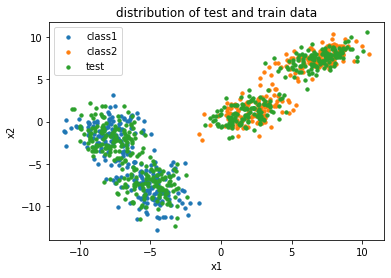

In [1]:
#code here
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#variables are assigned here
bandwidth = 0.5
k_size = 10


# Read csv files
df1 = pd.read_csv("./BBM409_HW2_dataset/Part1/Class1.csv").values.T[1:,:]
df2 = pd.read_csv("./BBM409_HW2_dataset/Part1/Class2.csv").values.T[1:,:]
test = pd.read_csv("./BBM409_HW2_dataset/Part1/Test.csv").values.T[1:,:]

plt.scatter(df1[:, 0] , df1[:, 1], label="class1", s=11)
plt.scatter(df2[:, 0] , df2[:, 1], label="class2", s=11)
plt.scatter(test[:, 0] , test[:, 1], label="test", s=11)

# printing the plot
plt.title("distribution of test and train data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


#Gaussian Kernel is here
def Gaussian_Kernel(u):
    return (1/(math.pi*2))*(math.exp((-1/2)*(u@u.T)))


#computes density estimation using KDE (V is fixed)
def Kernel_Density_Estimation(class_list, point):
    sumOfKernels = 0
    for i in class_list:
        sumOfKernels += Gaussian_Kernel((point-i)/bandwidth)
    return (1/(len(class_list)*(bandwidth**2)))*sumOfKernels
    
    

#computes density estimation using kNN (k is fixed)
# simply, I choose the first k one from the top
# last one gives us what the distance is
def kNN_Likelihood(distance_list):
    return k_size/(len(distance_list)*distance_list[k_size-1])

#compute the distances between the point and the each of the element in the class data
def Compute_Distance(lst, point):
    temp = []
    for i in lst:
        temp.append(math.sqrt((point[0]-i[0])**2 + (point[1]-i[1])**2))
    # I sort it, because it eases the computation while handling the kNN likelihood estimation
    temp.sort()
    return temp


# dataframe variable
data = {"Point":[], "Class1 Parzen":[], "Class1 kNN":[], "Class1 Prior":[], "Class1 Posterior Prob Parzen":[], 
        "Class1 Posterior Prob kNN":[], "Class2 Parzen":[], "Class2 kNN":[], "Class2 Prior":[], 
        "Class2 Posterior Prob Parzen":[], "Class2 Posterior Prob kNN":[]}
df = pd.DataFrame(data)



class1_prior = len(df1)/(len(df1)+len(df2))
class2_prior = len(df2)/(len(df1)+len(df2))
# computations are processed in here for each test data
for i in test:
    class1_dist = Compute_Distance(df1, i)
    class2_dist = Compute_Distance(df2, i)
    class1_parzen = Kernel_Density_Estimation(df1, i)
    class2_parzen = Kernel_Density_Estimation(df2, i)
    class1_kNN = kNN_Likelihood(class1_dist)
    class2_kNN = kNN_Likelihood(class2_dist)
    class1_posterior_prob_parzen = class1_prior * class1_parzen
    class1_posterior_prob_kNN = class1_prior * class1_kNN
    class2_posterior_prob_parzen = class2_prior * class2_parzen
    class2_posterior_prob_kNN = class2_prior * class2_kNN
    
    
    df.loc[len(df.index)] = [(str(i[0])+", "+str(i[1])), class1_parzen, class1_kNN, class1_prior, class1_posterior_prob_kNN, class1_posterior_prob_kNN,
                            class2_parzen, class2_kNN, class2_prior, class2_posterior_prob_kNN, class2_posterior_prob_kNN]

#saving the result in the csv file
df.to_csv("result.csv")

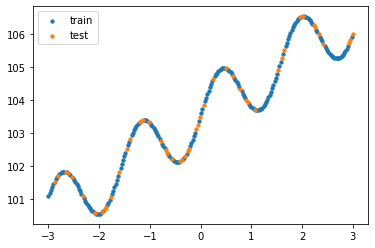

In [2]:
train = pd.read_csv("./BBM409_HW2_dataset/Part2/train.csv").values[:,1:]
test_data = pd.read_csv("./BBM409_HW2_dataset/Part2/test.csv").values[:,1:]


plt.scatter(train[:, 0] , train[:, 1], label="train", s=11)
plt.scatter(test_data[:, 0] , test_data[:, 1], label="test", s=11)


def Generate_Predicted_Equation(m):
    predicted = "w0"
    for i in range(1, m+1):
        temp_w = "w" + str(i)
        temp_x = "x**" + str(i)
        predicted += "+" + temp_w + "*" + temp_x
    return predicted

def Generate_W_Values(m):
    return [0 if i==0 else 1 for i in range(0,m+1)]


plt.legend()
plt.show()

<class 'numpy.ndarray'>
[99.8777515084243 100.796011295320 101.714271082215 102.632530869111
 103.550790656007 104.469050442902 105.387310229798 106.305570016693
 107.223829803589]
[-4 -3 -2 -1  0  1  2  3  4]


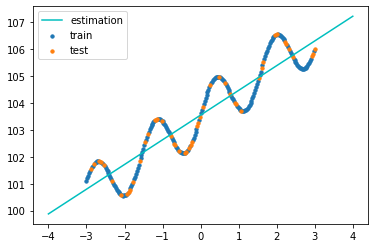

In [32]:
#for M=1
from sympy import *
x, y, z, w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, observed = symbols('x y z w0 w1 w2 w3 w4 w5 w6 w7 w8 w9 observed')
m=1
learning_rate = 0.001
predicted = Generate_Predicted_Equation(m)
w_values = Generate_W_Values(m)

#calculating error
sum_of_residuals = "(observed - (" + predicted + "))**2"

#we taking the derivative of the sum of residuals to detect minimum error point
#after we took the derivative, now we ll try to find the optimum value
#whenever step size converges to 0, we are ok. We ll do it for every w variable of course...
while True:
    #this counter counts the number of slopes for every w variable that converges to 0
    #whenever it is equal to m+1(# of w's), while loop is broken
    counter=0
    
    for i in range(m+1):
        w = "w"+str(i)
        slope = 0
        equation = diff(sum_of_residuals, w)
        variables = {}
        for k in range(m+1):
            variables["w"+str(k)] = w_values[k]
        for k in train:
            variables["x"] = k[0]
            variables["observed"] = k[1]
            slope += equation.subs(variables)
        
        step_size = slope*learning_rate
        w_values[i] = w_values[i] - step_size
        
        if abs(step_size) <= 0.01:
            counter += 1
    if counter == m+1:
        break
            
            
x = np.arange(-4, 5, 1)
y = eval("w_values[0] + w_values[1]*x")

print(type(y))
print(y)
print(x)
 
# plotting the points
plt.plot(x, y, color="c", label="estimation")


def Tabulate():
    plt.scatter(train[:, 0] , train[:, 1], label="train", s=11)
    plt.scatter(test_data[:, 0] , test_data[:, 1], label="test", s=11)
    plt.legend()
    plt.show()

Tabulate()



In [27]:
from sympy import *
x, y, z, w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, observed = symbols('x y z w0 w1 w2 w3 w4 w5 w6 w7 w8 w9 observed')

def Least_Squares_Regression(m, learning_rate, step_size_limit):
    
    predicted = Generate_Predicted_Equation(m)
    w_values = Generate_W_Values(m)
    sum_of_residuals = "(observed - (" + predicted + "))**2"

    
    #we taking the derivative of the sum of residuals to detect minimum error point
    #after we took the derivative, now we ll try to find the optimum value
    #whenever step size converges to 0, we are ok. We ll do it for every w variable of course...
    while True:
        
        #this counter counts the number of slopes for every w variable that converges to 0
        #whenever it is equal to m+1(# of w's), while loop is broken
        counter=0

        for i in range(m+1):
            w = "w"+str(i)
            slope = 0
            equation = diff(sum_of_residuals, w)
            variables = {}
            for k in range(m+1):
                variables["w"+str(k)] = w_values[k]
            for k in train:
                variables["x"] = k[0]
                variables["observed"] = k[1]
                slope += equation.subs(variables)
            
            step_size = slope*learning_rate
            w_values[i] = w_values[i] - step_size
            
            if abs(step_size) <= step_size_limit:
                counter += 1
        if counter == m+1:
            break
    
    estimated_function = str(w_values[0])
    for i in range(1, m+1):
        estimated_function += "+" + str(w_values[i]) + "*x"
        
    return eval(estimated_function)

ValueError: x and y must have same first dimension, but have shapes (8,) and (1,)

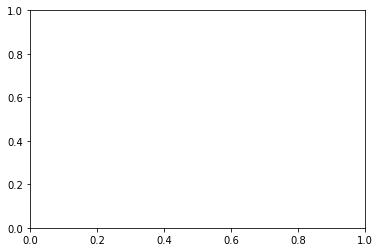

In [28]:
y = Least_Squares_Regression(1, 0.001, 0.01)
x = np.arange(-4, 4, 1)
plt.plot(x, y, color="c", label="estimation")
Tabulate()